In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [23]:
data = pd.read_csv('Encoded.csv')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526714 entries, 0 to 526713
Data columns (total 96 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   526714 non-null  int64  
 1   Seq          526714 non-null  int64  
 2   Dur          526714 non-null  float64
 3   RunTime      526714 non-null  float64
 4   Mean         526714 non-null  float64
 5   Sum          526714 non-null  float64
 6   Min          526714 non-null  float64
 7   Max          526714 non-null  float64
 8   sTos         526523 non-null  float64
 9   dTos         16433 non-null   float64
 10  sTtl         526523 non-null  float64
 11  dTtl         16433 non-null   float64
 12  sHops        526523 non-null  float64
 13  dHops        16433 non-null   float64
 14  TotPkts      526714 non-null  int64  
 15  SrcPkts      526714 non-null  int64  
 16  DstPkts      526714 non-null  int64  
 17  TotBytes     526714 non-null  int64  
 18  SrcBytes     526714 non-

In [25]:
from sklearn.feature_selection import mutual_info_classif

In [27]:
X = data.drop(columns= 'Label')
X = X.loc[:, ~X.columns.str.contains('^Unnamed')]
X = X.dropna(axis=1)

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526714 entries, 0 to 526713
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Seq         526714 non-null  int64  
 1   Dur         526714 non-null  float64
 2   RunTime     526714 non-null  float64
 3   Mean        526714 non-null  float64
 4   Sum         526714 non-null  float64
 5   Min         526714 non-null  float64
 6   Max         526714 non-null  float64
 7   TotPkts     526714 non-null  int64  
 8   SrcPkts     526714 non-null  int64  
 9   DstPkts     526714 non-null  int64  
 10  TotBytes    526714 non-null  int64  
 11  SrcBytes    526714 non-null  int64  
 12  DstBytes    526714 non-null  int64  
 13  Offset      526714 non-null  int64  
 14  sMeanPktSz  526714 non-null  float64
 15  dMeanPktSz  526714 non-null  float64
 16  Load        526714 non-null  float64
dtypes: float64(9), int64(8)
memory usage: 68.3 MB


In [32]:
Y = data.Label

In [33]:
# from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)
# y2_encoded = label_encoder.fit_transform(Y2)
# # print(y_encoded)

In [34]:
X = pd.get_dummies(X)

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526714 entries, 0 to 526713
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Seq         526714 non-null  int64  
 1   Dur         526714 non-null  float64
 2   RunTime     526714 non-null  float64
 3   Mean        526714 non-null  float64
 4   Sum         526714 non-null  float64
 5   Min         526714 non-null  float64
 6   Max         526714 non-null  float64
 7   TotPkts     526714 non-null  int64  
 8   SrcPkts     526714 non-null  int64  
 9   DstPkts     526714 non-null  int64  
 10  TotBytes    526714 non-null  int64  
 11  SrcBytes    526714 non-null  int64  
 12  DstBytes    526714 non-null  int64  
 13  Offset      526714 non-null  int64  
 14  sMeanPktSz  526714 non-null  float64
 15  dMeanPktSz  526714 non-null  float64
 16  Load        526714 non-null  float64
dtypes: float64(9), int64(8)
memory usage: 68.3 MB


In [37]:
mutual_info_1 = mutual_info_classif(X, y_encoded)

In [38]:
mutual_info_1 = pd.Series(mutual_info_1)

<Axes: >

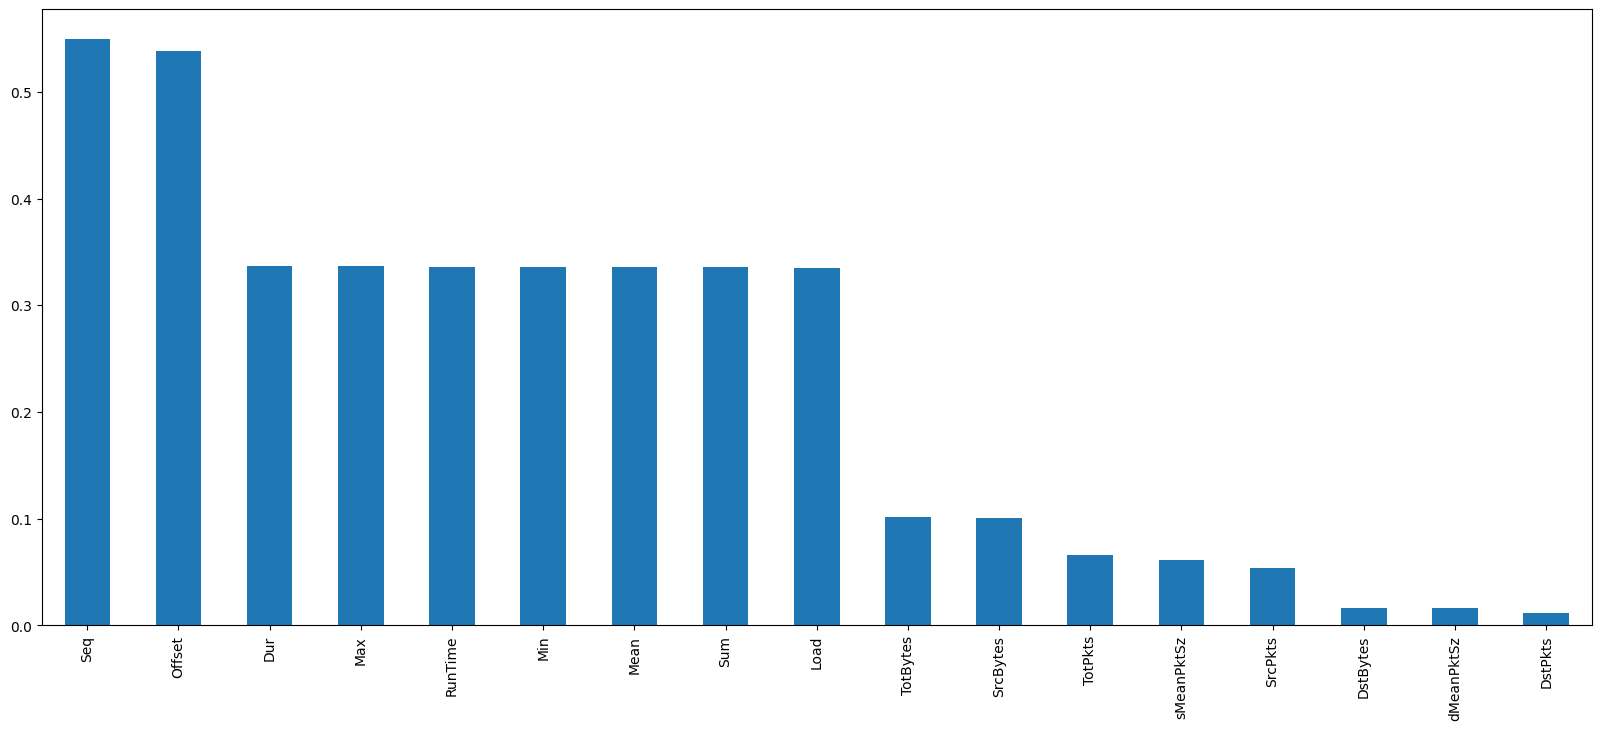

In [39]:
mutual_info_1.index = X.columns
mutual_info_1.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [ ]:
mutual_info_2 = mutual_info_classif(X, Y2)

In [ ]:
mutual_info_2.index = X.columns
mutual_info_2.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

In [ ]:
scaled_data = scaler.transform(X)

In [ ]:
scaled_data

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)

In [ ]:
pca.fit(scaled_data)

In [ ]:
x_pca = pca.transform(scaled_data)

In [ ]:
x_pca